In [279]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Job Roles to Explore

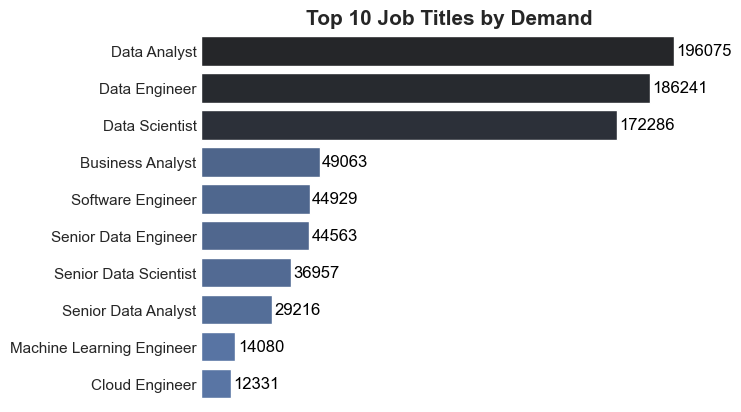

In [290]:
sns.set_theme(style='ticks')
df_plot = df['job_title_short'].value_counts().to_frame()
sns.barplot(df_plot,y='job_title_short',x='count',palette='dark:b_r',hue='count',legend=False).xaxis.set_visible(False)
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Job Titles by Demand',fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})

for index, value in enumerate(df_plot['count']):
    plt.text(value+1000, index, str(value), color='black', va='center')

sns.barplot().tick_params(axis='y',length=0)
sns.despine(left=True,bottom=True)

plt.show()

## Global Job Distribution by Country

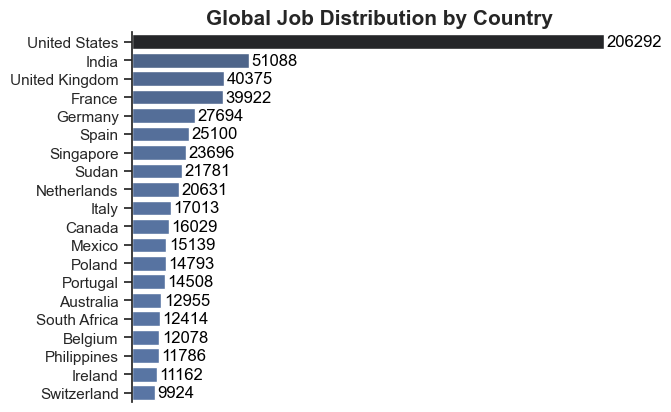

In [291]:
sns.set_theme(style='ticks')
df_plot = df['job_country'].value_counts().to_frame().head(20)
sns.barplot(df_plot,y='job_country',x='count',palette='dark:b_r',legend=False,hue='count').xaxis.set_visible(False)
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Global Job Distribution by Country',fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})

for index, value in enumerate(df_plot['count']):
    plt.text(value+1000, index, str(value), color='black', va='center')


sns.despine(left=False,bottom=True)

plt.show()

## Job Distribution by Role Across Companies

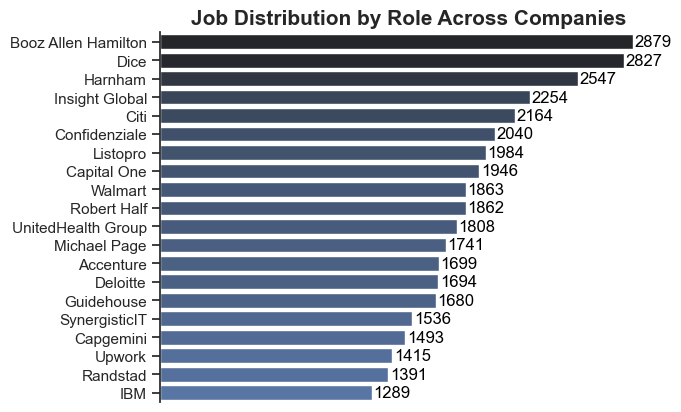

In [292]:
sns.set_theme(style='ticks')
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.barplot(df_plot,y='company_name',x='count',palette='dark:b_r',legend=False,hue='count').xaxis.set_visible(False)
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Job Distribution by Role Across Companies',fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})

for index, value in enumerate(df_plot['count']):
    plt.text(value+10, index, str(value), color='black', va='center')


sns.despine(left=False,bottom=True)

plt.show()

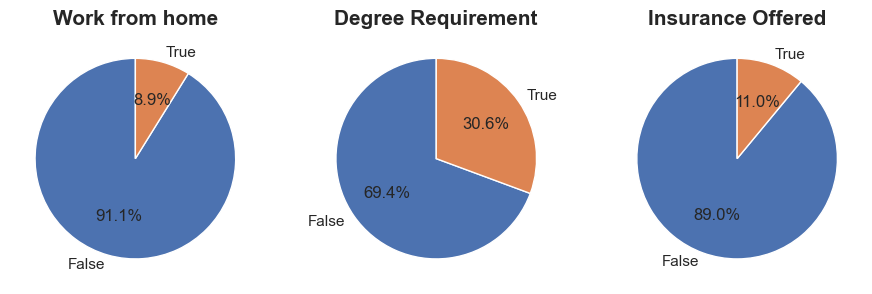

In [293]:
dict_Col = {
    "job_work_from_home" : "Work from home",
    "job_no_degree_mention" : "Degree Requirement",
    "job_health_insurance" : "Insurance Offered"
}

fig, ax = plt.subplots(1,3,)
fig.set_size_inches((11,3.5))

sns.set_theme(style="ticks")
for i, (column,title) in enumerate(dict_Col.items()):
    ax[i].pie(df[column].value_counts(),labels=['False',"True"],startangle=90,autopct='%1.1f%%')
    ax[i].set_title(title,fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})



In [ ]:
df_usa = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

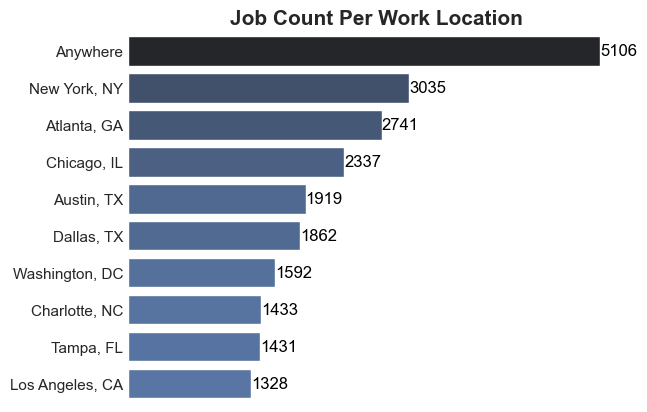

In [295]:

df_plot_loc = df_usa['job_location'].value_counts().to_frame().head(10)

sns.barplot(df_plot_loc,y='job_location',x='count',hue='count',palette='dark:b_r',legend=False)
sns.barplot().xaxis.set_visible(False)
sns.barplot().tick_params(axis='y',length=0)
plt.xlabel('Job Count')
plt.ylabel('')
plt.title('Job count per work location'.title(),fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})
sns.despine(left=True,bottom=True)

for index, value in enumerate(df_plot_loc['count']):
    plt.text(value +0.2, index, str(value), color='black', va='center')

plt.show()

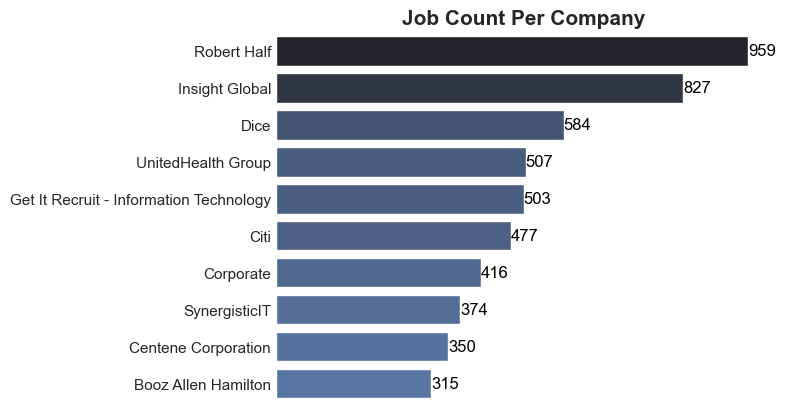

In [296]:
df_plot_loc = df_usa['company_name'].value_counts().to_frame().head(10)

sns.barplot(df_plot_loc,y='company_name',x='count',hue='count',palette='dark:b_r',legend=False)
sns.barplot().xaxis.set_visible(False)
plt.xlabel('Job Count')
plt.ylabel('')
plt.title('Job count per Company'.title(),fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})
sns.despine(left=True,bottom=True)
sns.barplot().tick_params(axis='y',length=0)


for index, value in enumerate(df_plot_loc['count']):
   plt.text(value, index, str(value), color='black', va='center')

plt.show()

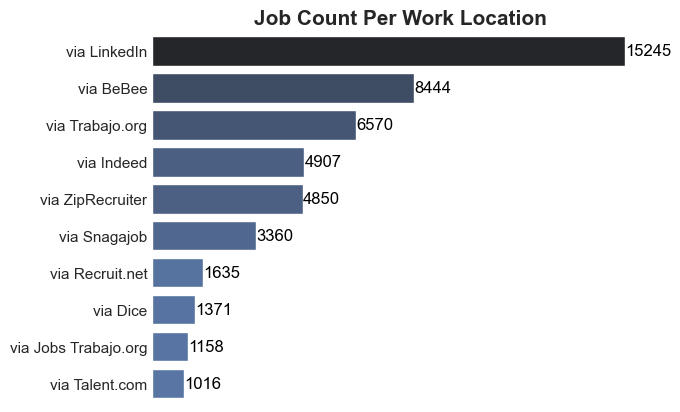

In [297]:
df_plot_loc = df_usa['job_via'].value_counts().to_frame().head(10)

sns.barplot(df_plot_loc,y='job_via',x='count',hue='count',palette='dark:b_r',legend=False)
sns.barplot().xaxis.set_visible(False)
plt.xlabel('Job Count')
plt.ylabel('')
plt.title('Job count per work location'.title(),fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})
sns.despine(left=True,bottom=True)
sns.barplot().tick_params(axis='y',length=0)



for index, value in enumerate(df_plot_loc['count']):
   plt.text(value, index, str(value), color='black', va='center')

plt.show()

In [298]:
df_usa.dropna(subset='salary_year_avg',inplace=True)
plotable = df_usa.groupby('company_name')['salary_year_avg'].mean().to_frame()

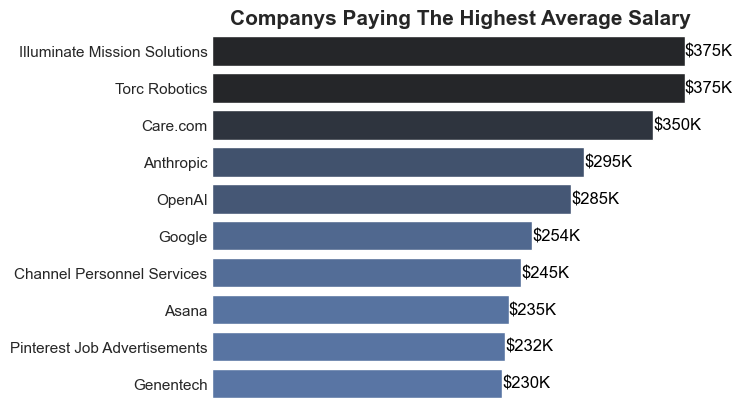

In [300]:
p = plotable.sort_values(by='salary_year_avg', ascending=False).head(10)
sns.barplot(p,x='salary_year_avg',y='company_name',hue='salary_year_avg',palette='dark:b_r',legend=False).xaxis.set_visible(False)
sns.despine(left=True,bottom=True)
sns.barplot().tick_params(axis='y',length=0)
sns.barplot().set_title('Companys paying the highest average salary'.title(),fontdict={
   'fontsize': 15,
   'fontweight':'bold'
})
plt.ylabel('')
plt.xlabel('salary average per year')

for index, value in enumerate(p['salary_year_avg'].head(10)):
   plt.text(value, index, '$' + str(int(value/1000)) + 'K', color='black', va='center')

In [301]:
df_usa = df[df['job_country'] == 'United States'].copy()

In [302]:
df_expo = df_usa.explode('job_skills')

df_expo[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [303]:


df_jobSkills = df_expo.groupby(['job_skills','job_title_short']).size()

df_jobSkills = df_jobSkills.reset_index(name='skill Count')
df_jobSkills.sort_values('skill Count',ascending=False,inplace=True)

df_jobSkills.head(10)

,job_skills,job_title_short,skill Count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
1522,sql,Data Engineer,23958
1208,python,Data Engineer,22762
1611,tableau,Data Analyst,19311
1207,python,Data Analyst,18382
123,aws,Data Engineer,15018


In [304]:
top3JobTitles = df_jobSkills['job_title_short'].unique().tolist()

top3JobTitles = sorted(top3JobTitles[:3])

top3JobTitles

['Data Analyst', 'Data Engineer', 'Data Scientist']

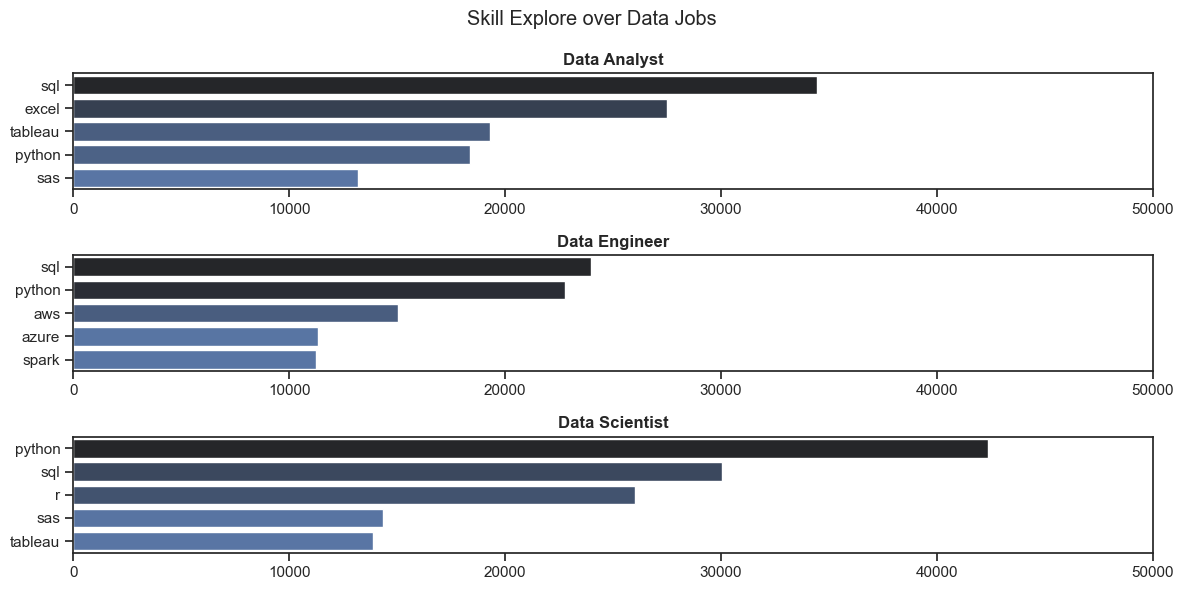

In [305]:
fig, ax = plt.subplots(3,1,figsize=(12, 6))
for i, jobTiitle in enumerate(top3JobTitles):
    df_plot = df_jobSkills[df_jobSkills['job_title_short'] == jobTiitle].head(5)
    sns.barplot(df_plot,y='job_skills',x='skill Count',ax=ax[i],hue='skill Count',palette='dark:b_r',legend=False)
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,50000)
    
    ax[i].set_ylabel('')
    
    ax[i].set_title(jobTiitle,fontdict={
   'fontsize': 12,
   'fontweight':'bold'
})

fig.suptitle('Skill Explore over Data Jobs',)
fig.tight_layout()

In [306]:
df_Job_count = df_usa['job_title_short'].value_counts().reset_index(name='Job_count')
df_Job_count

,job_title_short,Job_count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [307]:
df_perc = pd.merge(df_jobSkills,df_Job_count,on='job_title_short',how='right')
df_perc['percentage'] = (df_perc['skill Count']/df_perc['Job_count'])*100
df_perc

,job_skills,job_title_short,skill Count,Job_count,percentage
0,sql,Data Analyst,34452,67816,50.802171
1,excel,Data Analyst,27519,67816,40.578919
2,tableau,Data Analyst,19311,67816,28.475581
3,python,Data Analyst,18382,67816,27.105698
4,sas,Data Analyst,13200,67816,19.464433
...,...,...,...,...,...
1865,flask,Cloud Engineer,1,423,0.236407
1866,colocation,Cloud Engineer,1,423,0.236407
1867,php,Cloud Engineer,1,423,0.236407
1868,macos,Cloud Engineer,1,423,0.236407


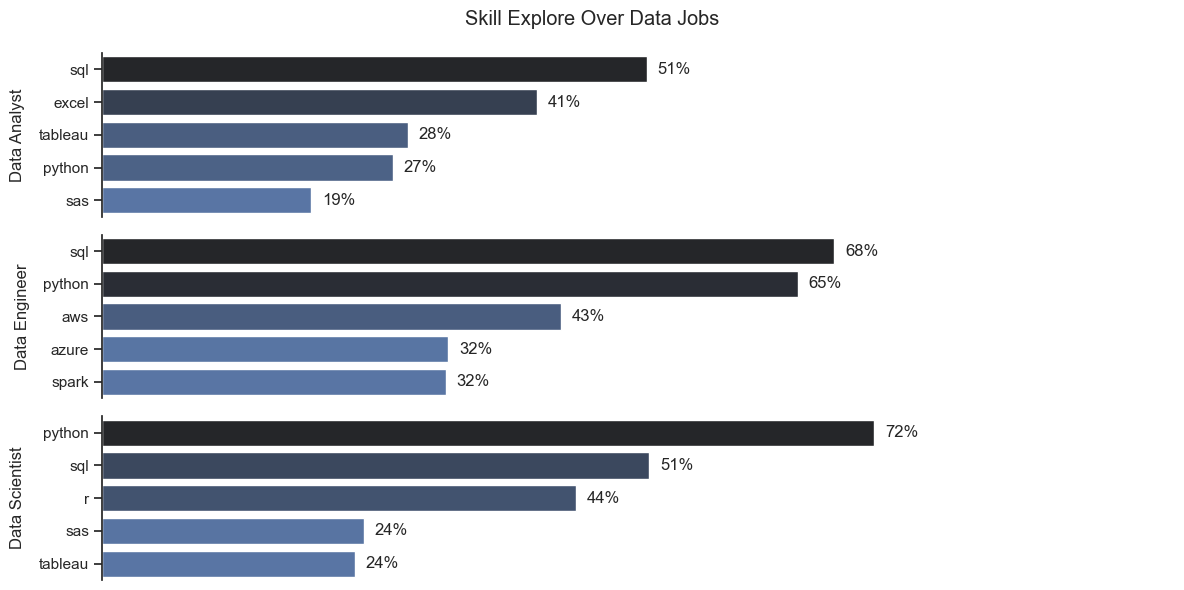

In [308]:
fig, ax = plt.subplots(3,1,figsize=(12, 6),sharex=['row'])
for i , Title in enumerate(top3JobTitles):
    df_perc_title = df_perc[df_perc['job_title_short'] == Title].head(5)
    sns.barplot(df_perc_title,y='job_skills',x='percentage',ax=ax[i],hue='percentage',palette='dark:b_r',legend=False).xaxis.set_visible(False)
    ax[i].set_xlim(0,100)
    
    ax[i].set_ylabel(Title.title(),labelpad= 10)

    sns.despine(ax=ax[i],bottom=True)

    for n, v in enumerate(df_perc_title['percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%',va='center')

fig.suptitle('Skill Explore over Data Jobs'.title())
fig.tight_layout()
